In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import InputLayer,Dense,Flatten,Conv2D,Activation,MaxPooling2D,Dropout
from keras import backend as K

In [2]:
data_augmentation = ImageDataGenerator(shear_range=0.2, zoom_range=0.2,
                                       horizontal_flip=True,rescale=1./255,
                                       validation_split=0.2)

In [31]:
train_data_dir  = "dataset"
validation_data_dir  = "testdataset"
nb_train_samples =234  
nb_validation_samples = 100
epochs = 10

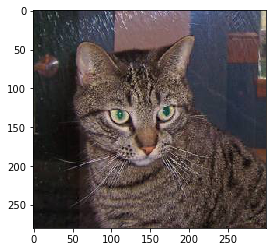

In [4]:
img = plt.imread("dataset/cat/cat.1.jpg")
plt.imshow(img)

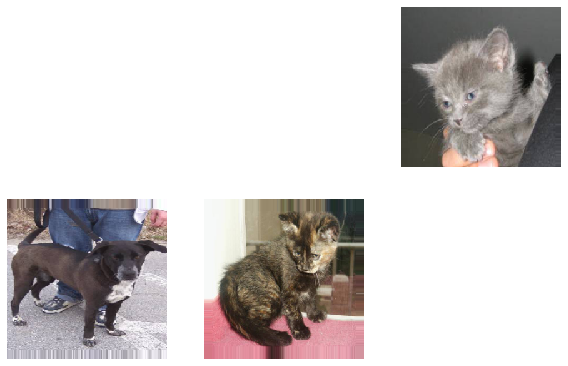

In [6]:
batch = train_generator.next()[0]
plt.figure(figsize=(10,10))
i = 0
for img in range(3):
    ax = plt.subplot(3,3,3+i)
    plt.imshow(batch[i])
    i+=1
    plt.axis("off")

In [33]:
IMAGE_SIZE = 256
EPOCHS = 10
CHANNELS = 3
batch_size = 32
img_width, img_height = 256, 256

In [34]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [35]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
  
test_datagen = ImageDataGenerator(rescale=1. / 255)
  
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 234 images belonging to 2 classes.


In [39]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 40 images belonging to 2 classes.


In [40]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
 8/12 [===================>..........] - 38s 5s/step - loss: 2.3834 - accuracy: 0.5641 - val_loss: 0.6921 - val_accuracy: 0.4750


In [41]:
model.save_weights('model_saved2.h5')

In [46]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np

In [62]:
# newmodel = load_model('model_saved2.h5')

In [60]:
image = load_img('dog.jpg', target_size=(256, 256))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,256,256,3)
label = model.predict(img)
print("Predicted Class (0 - Cat , 1- Dog): ",round(label[0][0]))

Predicted Class (0 - Cat , 1- Dog):  1.0


In [63]:
model.save('saved_model/my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [65]:
import tensorflow as tf
new_model = tf.keras.models.load_model('saved_model/my_model')
# Check its architecture
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 255, 255, 32)      416       
_________________________________________________________________
activation_10 (Activation)   (None, 255, 255, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 126, 126, 32)      4128      
_________________________________________________________________
activation_11 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 62, 62, 64)       

In [66]:
image = load_img('dog.jpg', target_size=(256, 256))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,256,256,3)
label = new_model.predict(img)
print("Predicted Class (0 - Cat , 1- Dog): ",round(label[0][0]))

Predicted Class (0 - Cat , 1- Dog):  1.0
